In [1]:
from orphics import io, maps, lensing, cosmology, stats
from pixell import enmap, curvedsky
import numpy as np
import os, sys
import healpy as hp
import matplotlib.pylab as plt
import symlens as s
from symlens import utils
import importlib
from mpi4py import MPI
import pandas as pd

In [3]:
# use maps provided by websky
map_path = 'maps/websky/'
# path of output data
data_path = 'data/'
# path of output plots
plot_path = 'temp'

In [19]:
ellmin, ellmax = 100, 3000

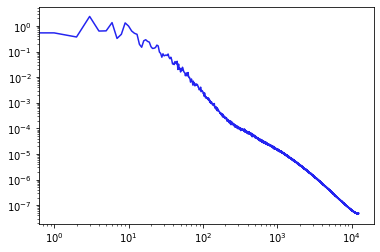

In [5]:
ksz_data = pd.read_csv(data_path + 'ksz_cl.csv')
ell, ksz_cl = ksz_data['ell'], ksz_data['ksz_cl']
plt.loglog(ell, ksz_cl)

In [89]:
ps = ksz_data.values
ps.shape

(12288, 2)

In [ ]:
ells = np.arange(ellmin, ellmax+1, 1)
bin_width = 20
bins = np.arange(ellmin, ellmax, bin_width)
ps = 
binned_ps, bin_edges, binnumber = stats.binned_statistic(ells, ps, statistic='mean',bins=bins)

In [58]:
type(ksz_data)
ksz_data.values

array([[0.00000000e+00, 5.90243277e-01],
       [1.00000000e+00, 5.38024353e-01],
       [2.00000000e+00, 3.71932251e-01],
       ...,
       [1.22850000e+04, 4.82971178e-08],
       [1.22860000e+04, 4.96392818e-08],
       [1.22870000e+04, 4.96870729e-08]])

In [68]:
import cosmoslib.aps as aps
import cosmoslib.aps.binning as binning
importlib.reload(cosmoslib)

<module 'cosmoslib' from '/global/u2/h/hongbo/tools/cosmoslib/cosmoslib/__init__.py'>

In [75]:
nbins = int((ellmax-ellmin)/20)
Bi = binning.Binning(ellmin, ellmax, nbins )
ps = aps.PS(ksz_data.values, order=('ell', 'TT')).resample(Bi.ells)
type(ps)

cosmoslib.aps.ps.PS

In [77]:
Bi.ells

array([ 100,  101,  102, ..., 2998, 2999, 3000])

In [71]:
binned_ksz_cl = binning.BinnedPS(ps, Bi)

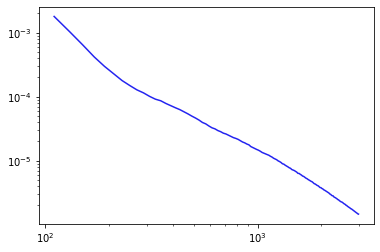

In [72]:
plt.loglog(binned_ksz_cl.ell,binned_ksz_cl.TT)

In [53]:
rs = binned_ksz_cl.resample(Bi.ells)

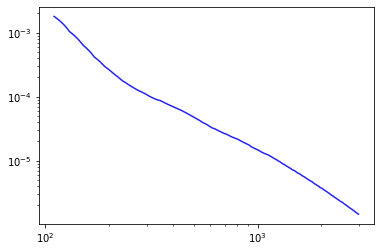

In [55]:
plt.loglog(rs.ell, rs.TT)